In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
DFexp0 = pd.read_excel('Indicateurs_a_envoyer_aux_etudiants_Simplon.xlsx', sheet_name = 'Collection Experts')

In [38]:
DFexp1 = DFexp0
DFexp1['updatedAt'] = pd.to_datetime(DFexp0['updatedAt'], unit='ms') #changement de type int a date

In [39]:
DFexp1['createdAt'] = pd.to_datetime(DFexp0['createdAt'], format='%d/%m/%Y', errors='coerce') # changement du format
DFexp1['linkedInImport'] = DFexp0['linkedInImport'].fillna(0).astype(bool) #NaN = 0, changement de float a Booleen

In [40]:
seuil_non_nullite = int(0.85 * len(DFexp0))

DFexp2 = DFexp1.dropna(axis=1, thresh=seuil_non_nullite)
DFexp2.shape

(2455, 11)

In [41]:
# Convertir 'createdAt' en semestre
DFexp3['semester'] = DFexp3.index.to_period('Q').strftime('Q%q')

# Grouper par semestre et agréger les IDs
semester_groups = DFexp3.groupby('semester')['userId'].agg(list)

# Convertir le résultat en DataFrame
semester_groups_df = pd.DataFrame({'Count': semester_groups})

In [47]:
DFexp3

,_id,type,userId,updatedAt,domains,experiences,visible,percentage,linkedInImport,geo,semester
createdAt,,,,,,,,,,,
2023-11-01,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-12-01 19:49:42.590,Enseignement / Recherche / Formation,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...",0.0,25.0,False,NaN,Q4
2023-11-01,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-12-01 16:41:00.078,NaN,"[{""company"":""Akigora.com"",""job"":""Développeur w...",0.0,0.0,True,"{""localized"":true,""localizationSuccess"":true,""...",Q4
2023-11-01,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-12-01 10:34:32.307,Informatique / Télécoms,"[{""date"":612396000000,""dateEnd"":1688421600000,...",1.0,100.0,True,"{""localized"":true,""localizationSuccess"":true,""...",Q4
2023-10-30,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,"[{""date"":1172703600000,""dateEnd"":1565820000000...",1.0,100.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q4
2023-10-30,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,False,NaN,Q4
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-20,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2021-10-27 14:23:54.005,Services aux entreprises,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",1.0,55.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q3
2018-09-20,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2021-10-27 14:23:54.004,Commerce / Négoce / Distribution,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",1.0,55.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q3
2018-09-19,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2022-08-15 08:50:42.806,Industrie,"[{""date"":1483225200000,""dateEnd"":1546297200000...",1.0,100.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q3


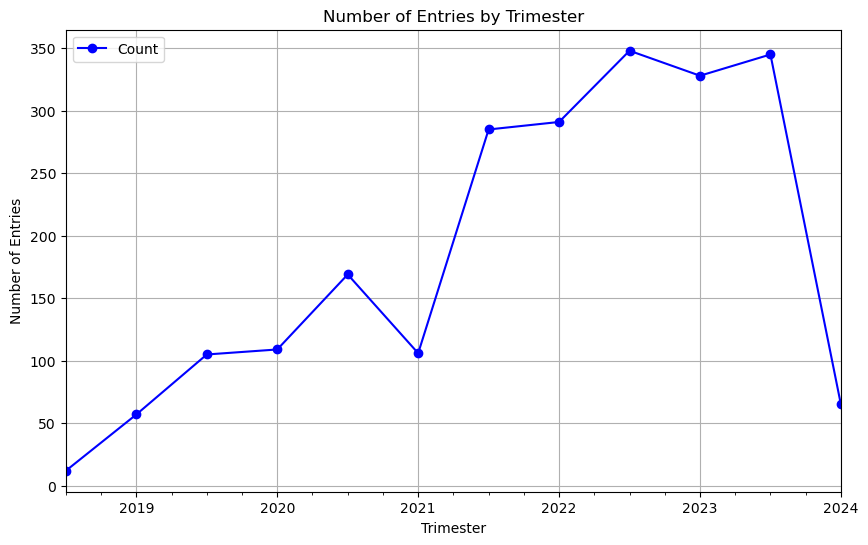

In [42]:
trimester_groups_df = pd.DataFrame({'Count': DFexp3.resample('2Q').size()})
trimester_groups_df.plot(kind='line', marker='o', linestyle='-', color='b', figsize=(10, 6))

plt.title('Number of Entries by Trimester')
plt.xlabel('Trimester')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.show()

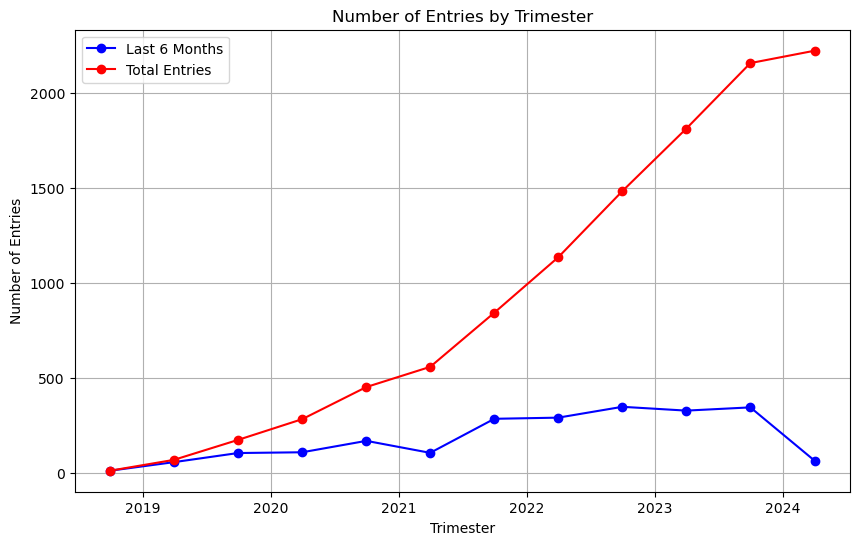

In [43]:
total_entries = DFexp3.resample('2Q').size().cumsum()

total_entries_df = pd.DataFrame({'Total Entries': total_entries})

plt.figure(figsize=(10, 6))

plt.plot(trimester_groups_df.index, trimester_groups_df['Count'], marker='o', linestyle='-', color='b', label='Last 6 Months')

plt.plot(total_entries_df.index, total_entries_df['Total Entries'], marker='o', linestyle='-', color='r', label='Total Entries')

plt.title('Number of Entries by Trimester')
plt.xlabel('Trimester')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.legend()
plt.show()


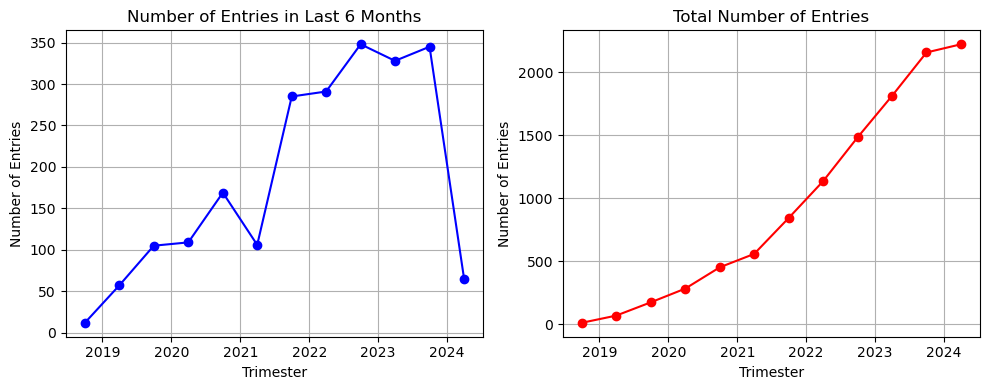

In [44]:
# Calculer le nombre total d'inscriptions depuis le début
total_entries = DFexp3.resample('2Q').size().cumsum()

# Créer un DataFrame pour le total des inscriptions
total_entries_df = pd.DataFrame({'Total Entries': total_entries})

# Plot en subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plotter la courbe pour les inscriptions des 6 derniers mois
axes[0].plot(trimester_groups_df.index, trimester_groups_df['Count'], marker='o', linestyle='-', color='b')
axes[0].set_title('Number of Entries in Last 6 Months')
axes[0].set_xlabel('Trimester')
axes[0].set_ylabel('Number of Entries')
axes[0].grid(True)

# Plotter la courbe pour le total des inscriptions depuis le début
axes[1].plot(total_entries_df.index, total_entries_df['Total Entries'], marker='o', linestyle='-', color='r')
axes[1].set_title('Total Number of Entries')
axes[1].set_xlabel('Trimester')
axes[1].set_ylabel('Number of Entries')
axes[1].grid(True)

# Ajuster le layout pour éviter le chevauchement
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [45]:
print(DFexp3.columns)


Index(['_id', 'type', 'userId', 'updatedAt', 'domains', 'experiences',
       'visible', 'percentage', 'linkedInImport', 'geo', 'semester'],
      dtype='object')


In [46]:
DFexp3

,_id,type,userId,updatedAt,domains,experiences,visible,percentage,linkedInImport,geo,semester
createdAt,,,,,,,,,,,
2023-11-01,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,2023-12-01 19:49:42.590,Enseignement / Recherche / Formation,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...",0.0,25.0,False,NaN,Q4
2023-11-01,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,2023-12-01 16:41:00.078,NaN,"[{""company"":""Akigora.com"",""job"":""Développeur w...",0.0,0.0,True,"{""localized"":true,""localizationSuccess"":true,""...",Q4
2023-11-01,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,2023-12-01 10:34:32.307,Informatique / Télécoms,"[{""date"":612396000000,""dateEnd"":1688421600000,...",1.0,100.0,True,"{""localized"":true,""localizationSuccess"":true,""...",Q4
2023-10-30,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,2023-12-01 13:59:47.742,Commerce / Négoce / Distribution,"[{""date"":1172703600000,""dateEnd"":1565820000000...",1.0,100.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q4
2023-10-30,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,2023-11-30 17:12:52.080,NaN,NaN,NaN,NaN,False,NaN,Q4
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-20,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,2021-10-27 14:23:54.005,Services aux entreprises,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",1.0,55.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q3
2018-09-20,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,2021-10-27 14:23:54.004,Commerce / Négoce / Distribution,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",1.0,55.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q3
2018-09-19,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,2022-08-15 08:50:42.806,Industrie,"[{""date"":1483225200000,""dateEnd"":1546297200000...",1.0,100.0,False,"{""localized"":true,""localizationSuccess"":true,""...",Q3
